## Linear Regression from Scratch
### This notebook implements linear regression using gradient descent and normal equation.
### Aside from that, in that notebook, neither `numpy` or any other additional library is not going to be used.

In [4]:
import random
import math
import matplotlib.pyplot as plt

In [5]:
random.seed(42)
X = [i for i in range(1, 21)]  # 1, 2, ..., 20
# y = 2.5x + noise in [-5, +5]
y = [2.5 * x + random.uniform(-5, 5) for x in X]

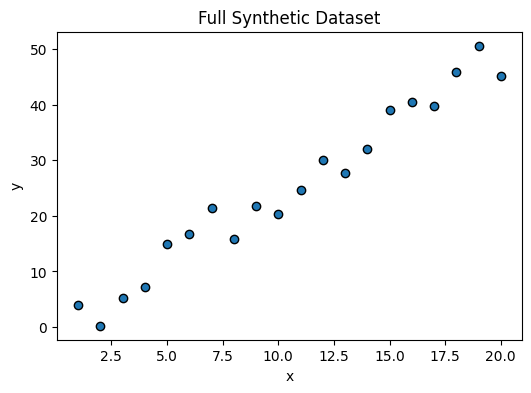

In [6]:
plt.figure(figsize=(6,4))
plt.scatter(X, y, edgecolors='k')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Full Synthetic Dataset")
plt.show()

In [7]:
data = list(zip(X, y))
random.shuffle(data)

split_idx = int(0.8 * len(data))
train_data = data[:split_idx]
test_data  = data[split_idx:]

X_train, y_train = zip(*train_data)
X_test,  y_test  = zip(*test_data)

In [8]:
class LinearRegression:
    def __init__(self):
        self.m = 0.0  # slope
        self.b = 0.0  # intercept

    def fit(self, X, y):
        n = len(X)
        x_mean = sum(X) / n
        y_mean = sum(y) / n

        num = sum((X[i] - x_mean)*(y[i] - y_mean) for i in range(n))
        den = sum((X[i] - x_mean)**2 for i in range(n))
        self.m = num/den if den != 0 else 0.0
        self.b = y_mean - self.m*x_mean

    def predict(self, X):
        return [self.m*x + self.b for x in X]

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Learned parameters → slope m = {model.m:.4f}, intercept b = {model.b:.4f}")

Learned parameters → slope m = 2.5246, intercept b = -1.3490


In [10]:
# Prediction + evaluation
y_pred = model.predict(X_test)

n_test = len(X_test)
mse  = sum((y_test[i] - y_pred[i])**2 for i in range(n_test)) / n_test
rmse = math.sqrt(mse)

In [11]:
y_mean_test = sum(y_test) / n_test
ss_tot = sum((yi - y_mean_test)**2 for yi in y_test)
ss_res = sum((y_test[i] - y_pred[i])**2 for i in range(n_test))
r2     = 1 - ss_res/ss_tot if ss_tot != 0 else 0.0

print(f"Test MSE : {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R²  : {r2:.4f}")

Test MSE : 3.9932
Test RMSE: 1.9983
Test R²  : 0.8687


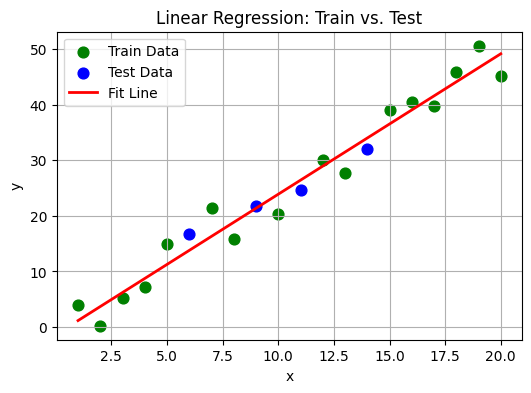

In [12]:
plt.figure(figsize=(6, 4))

# training data
plt.scatter(X_train, y_train, color='green', s=60, label='Train Data')

# test data
plt.scatter(X_test, y_test, color='blue', s=60, label='Test Data')

x_min, x_max = min(X), max(X)
y_min_line = model.m * x_min + model.b
y_max_line = model.m * x_max + model.b
plt.plot([x_min, x_max], [y_min_line, y_max_line], 'red', linewidth=2, label='Fit Line')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression: Train vs. Test")
plt.legend()
plt.grid(True)
plt.show()

### What we have understood:

#### According to the code of `class LinearRegressionScratch()`, we can observe that the Linear Regression algorithm is simply based on fitting a straight line (`y = kx + b`) to the training data with mitigating SS (Sum of the Squares) down to its potential minima, starting from `y = 0*x + 0`.
##### Incidentally, this is the main reason why this algorithm is also called "Least Squares".